https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2023/01-intro/homework.md

The goal of this homework is to train a simple model for predicting the duration of a ride

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Q1. Downloading the data

Download the "Yellow Taxi Trip Records" data for January and February 2022 from [NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

Read the data for January. How many columns are there?

In [3]:
data = pd.read_parquet('../../data/yellow_tripdata_2022-01.parquet')
print(data.shape)
data.head()

(2463931, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


Answer: __19__ columns

# Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [4]:
def create_features(df):
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df['duration'].apply(lambda x: x.total_seconds() / 60)
    return df

In [5]:
data = create_features(data)
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [6]:
data.duration.describe().apply(lambda x: format(x, 'f'))

count    2463931.000000
mean          14.212203
std           46.445305
min        -3442.400000
25%            6.316667
50%           10.183333
75%           16.166667
max         8513.183333
Name: duration, dtype: object

In [7]:
round(data.duration.std(), 2)

46.45

Answer: __46.45__ (the standard deviation of the trips duration in January)

# Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [8]:
def filter_outliers(df):
    return df.query('duration >= 1 & duration <= 60')

In [9]:
df = filter_outliers(data)
print(df.shape)
df.head()

(2421440, 20)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [10]:
fraction = 100 * len(df) / len(data)
fraction

98.27547930522405

Answer: __98 %__ of the records left after dropped the outliers

# Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [11]:
cat_columns = ['PULocationID', 'DOLocationID']

In [12]:
dv = DictVectorizer()
train_dicts = df[cat_columns].astype(str).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

Answer: __515__ columns

# Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [13]:
target = 'duration'
y_train = df[target].values

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

predicts = model.predict(X_train)

In [15]:
def hist_plot(y_true, y_pred, model_name = 'Linear regression'):
    plt.hist(y_true, bins=50, label='y_true', alpha=0.5)
    plt.hist(y_pred, bins=50, label='y_pred', alpha=0.5)
    
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    plt.title(f'{model_name}. RMSE: {rmse:.2f}')
    
    plt.legend();

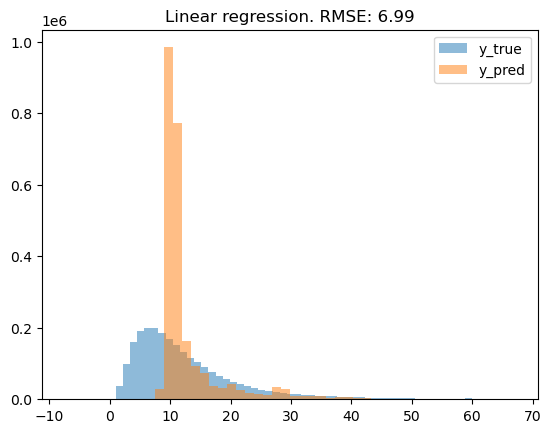

In [16]:
hist_plot(y_train, predicts)

Answer: __6.99__ RMSE on train

# Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2022).

What's the RMSE on validation?

In [17]:
def read_preprocess_dataframe(filename):
    df = pd.read_parquet(filename)
    df = create_features(df)
    df = filter_outliers(df)
    df[cat_columns] = df[cat_columns].astype(str)
    
    return df

In [18]:
df_val = read_preprocess_dataframe('../../data/yellow_tripdata_2022-02.parquet')
print(df_val.shape)
df_val.head()

(2918187, 20)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.0,5.40,1.0,N,138,252,1,17.0,1.75,0.5,3.90,0.00,0.3,23.45,0.0,1.25,12.433333
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.0,6.40,1.0,N,138,41,2,21.0,1.75,0.5,0.00,6.55,0.3,30.10,0.0,1.25,17.550000
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.0,12.50,1.0,N,138,200,2,35.5,1.75,0.5,0.00,6.55,0.3,44.60,0.0,1.25,23.650000
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.0,9.88,1.0,N,239,200,2,28.0,0.50,0.5,0.00,3.00,0.3,34.80,2.5,0.00,20.083333
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.0,12.16,1.0,N,138,125,1,35.5,0.50,0.5,8.11,0.00,0.3,48.66,2.5,1.25,26.316667


In [19]:
val_dicts = df_val[cat_columns].astype(str).to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val

<2918187x515 sparse matrix of type '<class 'numpy.float64'>'
	with 5836368 stored elements in Compressed Sparse Row format>

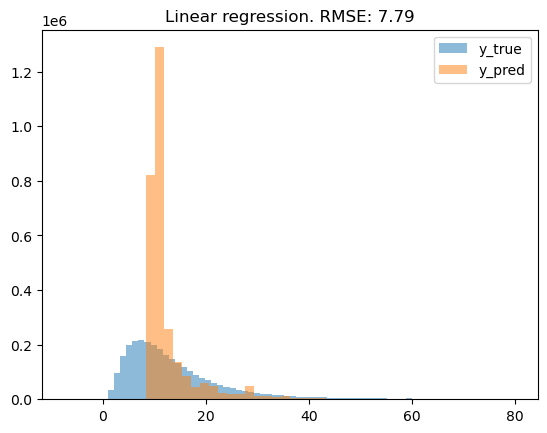

In [20]:
y_val = df_val[target].values
y_pred = model.predict(X_val)
hist_plot(y_val, y_pred)

Answer: __7.79__ RMSE on validation